# Fourier Transforms

## Complex numbers

In [112]:
imag = 1j

In [113]:
imag ** 2


(-1+0j)

In [114]:
complex_num = 3 + 2j

In [115]:
complex_num * imag

(-2+3j)

In [116]:
complex_num.real

3.0

In [117]:
complex_num.imag

2.0

In [118]:
import numpy as np

In [119]:
complex_vec = np.array([imag, complex_num])

complex_vec

array([0.+1.j, 3.+2.j])

In [120]:
complex_vec.real

array([0., 3.])

In [121]:
complex_vec.imag

array([1., 2.])

In [122]:
complex_vec.dtype

dtype('complex128')

In [123]:
np.abs(complex_vec)

array([1.        , 3.60555128])

## 1D Discrete Fourier Transform

In [124]:
from numpy import fft

In [125]:
num_samples = 400
samples_freq = 1/200
times = np.linspace(0, samples_freq * num_samples, num_samples)

In [126]:
times

array([0.        , 0.00501253, 0.01002506, 0.01503759, 0.02005013,
       0.02506266, 0.03007519, 0.03508772, 0.04010025, 0.04511278,
       0.05012531, 0.05513784, 0.06015038, 0.06516291, 0.07017544,
       0.07518797, 0.0802005 , 0.08521303, 0.09022556, 0.0952381 ,
       0.10025063, 0.10526316, 0.11027569, 0.11528822, 0.12030075,
       0.12531328, 0.13032581, 0.13533835, 0.14035088, 0.14536341,
       0.15037594, 0.15538847, 0.160401  , 0.16541353, 0.17042607,
       0.1754386 , 0.18045113, 0.18546366, 0.19047619, 0.19548872,
       0.20050125, 0.20551378, 0.21052632, 0.21553885, 0.22055138,
       0.22556391, 0.23057644, 0.23558897, 0.2406015 , 0.24561404,
       0.25062657, 0.2556391 , 0.26065163, 0.26566416, 0.27067669,
       0.27568922, 0.28070175, 0.28571429, 0.29072682, 0.29573935,
       0.30075188, 0.30576441, 0.31077694, 0.31578947, 0.32080201,
       0.32581454, 0.33082707, 0.3358396 , 0.34085213, 0.34586466,
       0.35087719, 0.35588972, 0.36090226, 0.36591479, 0.37092

In [127]:
simple_signal = np.sin(20 * np.pi * times)

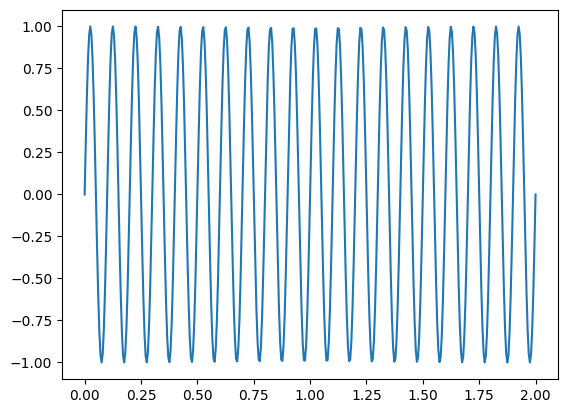

In [128]:
from matplotlib import pyplot as plt

plt.plot(times, simple_signal)

In [129]:
F_f = fft.rfft(simple_signal)

print(F_f.shape)
print(F_f[:5])

(201,)
[-2.70894418e-14+0.j          3.89442838e-04-0.04958438j
  1.56951361e-03-0.09991012j  3.57633541e-03-0.1517563j
  6.47323126e-03-0.20598156j]


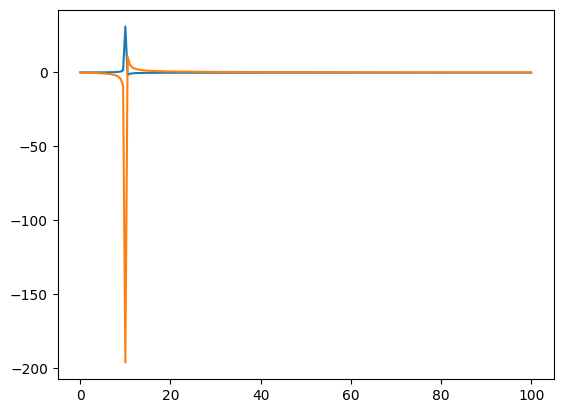

In [130]:
frequency_domain = fft.rfftfreq(num_samples, samples_freq)

plt.plot(frequency_domain, F_f.real)
plt.plot(frequency_domain, F_f.imag)

In [131]:
two_signal = np.sin(100 * np.pi * times) + np.sin(40 * np.pi * times)

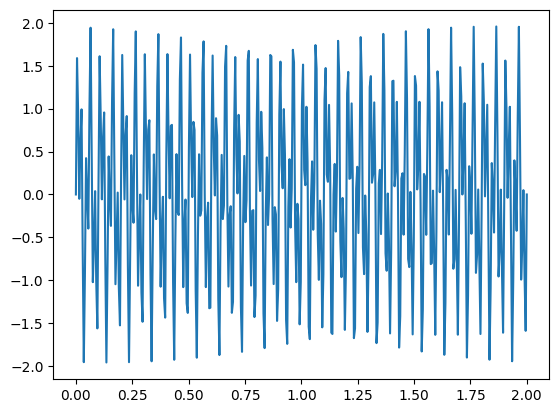

In [132]:
plt.plot(times, two_signal)

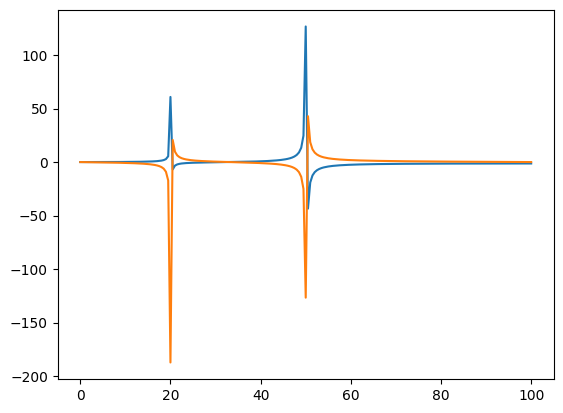

In [133]:
F_2 = fft.rfft(two_signal)

plt.plot(frequency_domain, F_2.real)
plt.plot(frequency_domain, F_2.imag)

In [134]:
F_2[frequency_domain > 40] = 0

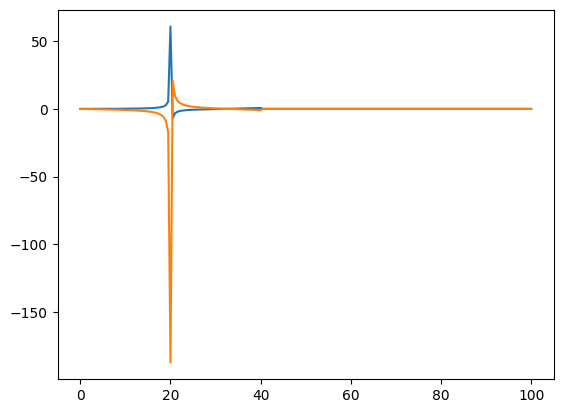

In [135]:
plt.plot(frequency_domain, F_2.real)
plt.plot(frequency_domain, F_2.imag)

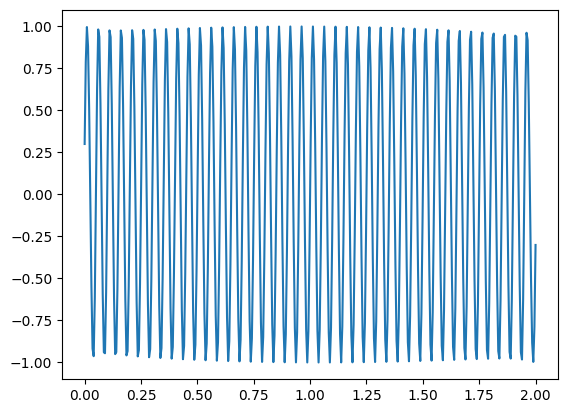

In [136]:
lower_freq = fft.irfft(F_2)

plt.plot(times, lower_freq)

## Smoothing a Signal

In [137]:
times = np.linspace(0, 2, 600)
signal = np.exp(
    -np.cos(30 * np.pi * times)**2) \
    * (np.cos(10 * np.pi * times) + np.sin(100 * np.pi * times)
)

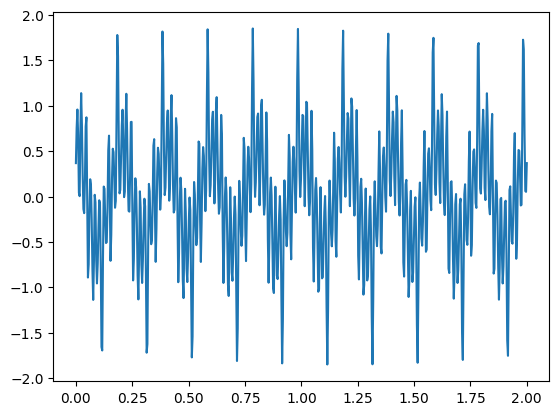

In [138]:
plt.plot(times, signal)

In [139]:
F_f = fft.rfft(signal)

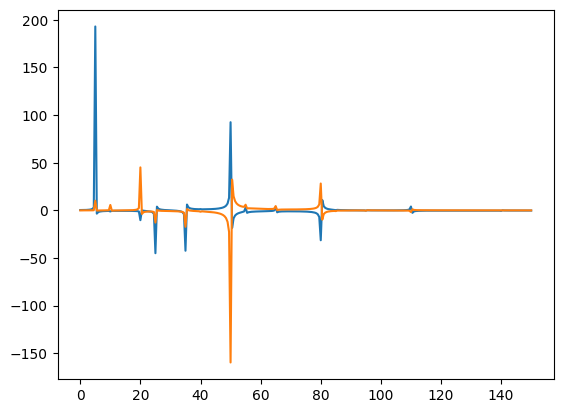

In [140]:
frequency_domain = fft.rfftfreq(600, 1/300)

plt.plot(frequency_domain, F_f.real)
plt.plot(frequency_domain, F_f.imag)

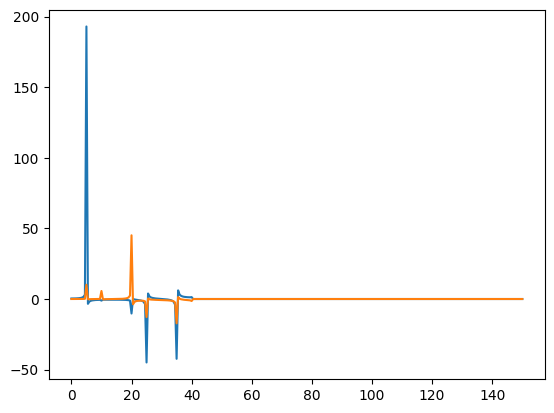

In [141]:
F_f[frequency_domain > 40] = 0

plt.plot(frequency_domain, F_f.real)
plt.plot(frequency_domain, F_f.imag)

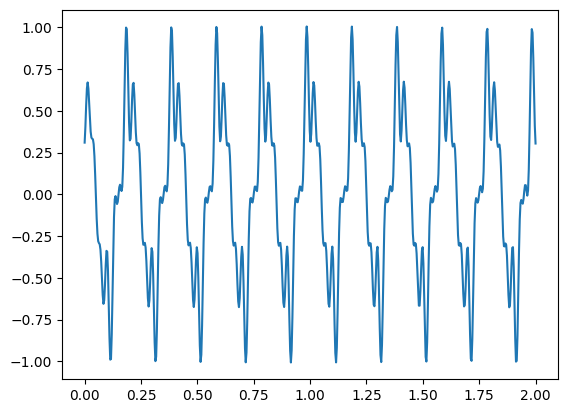

In [142]:
smooth = fft.irfft(F_f)

plt.plot(times, smooth)

## 2D Fourier Transform

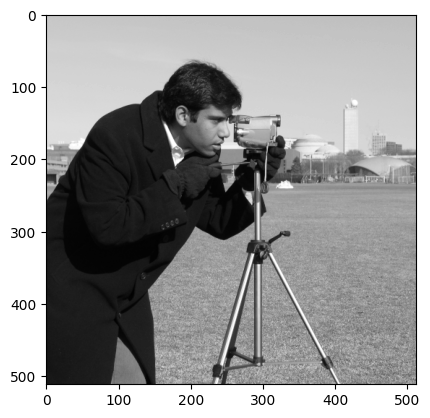

In [143]:
from skimage.data import camera

camera = camera()

plt.imshow(camera, cmap=plt.cm.gray)

In [144]:
F_camera = fft.rfft2(camera)

print(F_camera.shape)
print(F_camera[:5])

(512, 257)
[[ 3.38324950e+07+0.00000000e+00j  1.46776330e+04+6.37922066e+06j
   3.31922363e+05+1.53194046e+06j ... -1.29753026e+04+1.49953896e+03j
  -8.94032461e+03+4.75530925e+03j -2.60530000e+04+0.00000000e+00j]
 [ 4.94699785e+06-4.04887913e+06j -1.26099790e+06-4.82137610e+06j
  -2.31216026e+06-3.01125892e+05j ...  3.53483567e+03-2.30715519e+04j
   5.58618019e+03-1.35697118e+03j -1.28616899e+04-1.82754281e+04j]
 [-1.48692366e+06-2.41932478e+06j -6.66793200e+05-6.35526475e+05j
  -1.51800922e+06+8.92235152e+05j ...  4.19469822e+03+8.68285360e+03j
  -1.01136604e+04-2.26942064e+03j  1.16738686e+04-6.47151939e+03j]
 [ 6.51631768e+05-1.09450568e+06j -1.51658321e+06+5.07375623e+05j
   1.44247236e+06+4.04283368e+05j ... -3.50035276e+03+4.28481415e+02j
  -2.24645250e+03-3.55193760e+03j -5.88633533e+03-9.32785054e+03j]
 [-1.61426666e+03-1.36785607e+06j  4.84459863e+05+2.54761283e+05j
  -3.12851851e+05-9.18381033e+05j ...  6.57525887e+02+2.45786579e+03j
   1.83893852e+03-2.33300777e+03j -1.3227

In [145]:
log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())

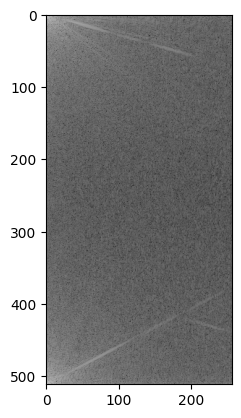

In [146]:
plt.imshow(log, cmap=plt.cm.gray)

In [147]:
np.count_nonzero(log)

131584

In [148]:
F_camera[np.abs(F_camera) < 50000] = 0

log = np.log(1 + np.abs(F_camera)) / np.log(1 + np.abs(F_camera).max())

np.count_nonzero(log)

1796

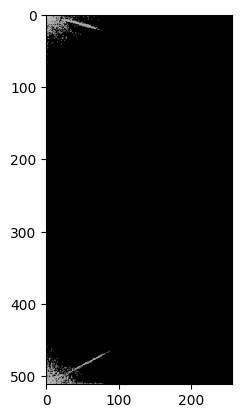

In [149]:
plt.imshow(log, cmap=plt.cm.gray)

In [150]:
compress = fft.irfft2(F_camera)

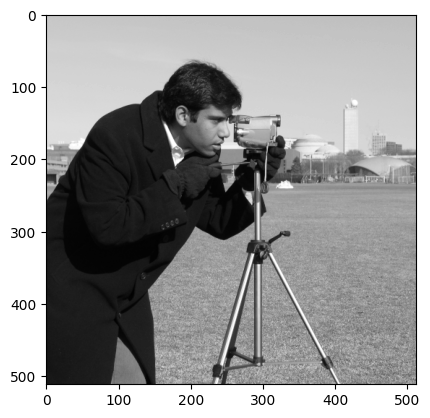

In [151]:
plt.imshow(camera, cmap=plt.cm.gray)

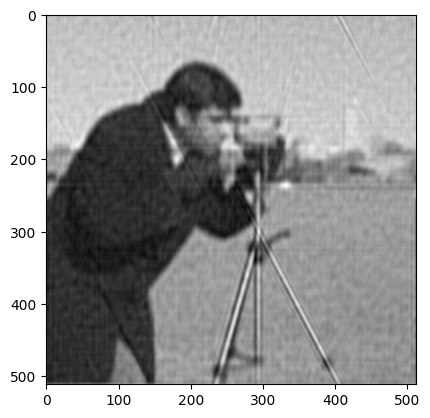

In [152]:
plt.imshow(compress, cmap=plt.cm.gray)